In [33]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

def generate_accuracy_and_heatmap(model, x, y):
    #     cm = confusion_matrix(y,model.predict(x))
    #     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Class_Label'],name='Actual')))
    return 1

df = pd.read_csv('CS170_Spring_2023_Large_data__44.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class_Label  1000 non-null   float64
 1   Feature 1    1000 non-null   float64
 2   Feature 2    1000 non-null   float64
 3   Feature 3    1000 non-null   float64
 4   Feature 4    1000 non-null   float64
 5   Feature 5    1000 non-null   float64
 6   Feature 6    1000 non-null   float64
 7   Feature 7    1000 non-null   float64
 8   Feature 8    1000 non-null   float64
 9   Feature 9    1000 non-null   float64
 10  Feature 10   1000 non-null   float64
 11  Feature 11   1000 non-null   float64
 12  Feature 12   1000 non-null   float64
 13  Feature 13   1000 non-null   float64
 14  Feature 14   1000 non-null   float64
 15  Feature 15   1000 non-null   float64
 16  Feature 16   1000 non-null   float64
 17  Feature 17   1000 non-null   float64
 18  Feature 18   1000 non-null   float64
 19  Feature

In [35]:
# Display the normalized DataFrame
print(df)

     Class_Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0          1.000     -0.971     -0.078      0.152      1.100     -1.620   
1          1.000     -1.330     -0.710     -0.563     -0.940     -1.290   
2          2.000     -0.142     -0.370      0.174      0.221     -0.242   
3          2.000      0.115      1.020     -1.640      0.270     -0.471   
4          2.000      0.019     -0.381      0.045      0.694      1.300   
..           ...        ...        ...        ...        ...        ...   
995        2.000      1.180     -1.370     -0.019     -0.577     -1.550   
996        2.000     -0.782     -0.150     -1.480      0.391      0.397   
997        2.000      1.290      1.880     -1.380     -0.535     -0.324   
998        2.000     -0.238      0.694     -1.020      0.415      0.214   
999        2.000     -0.155      0.757     -0.988      0.956     -0.347   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 31  Feature 32  \
0        1.270     

41
5


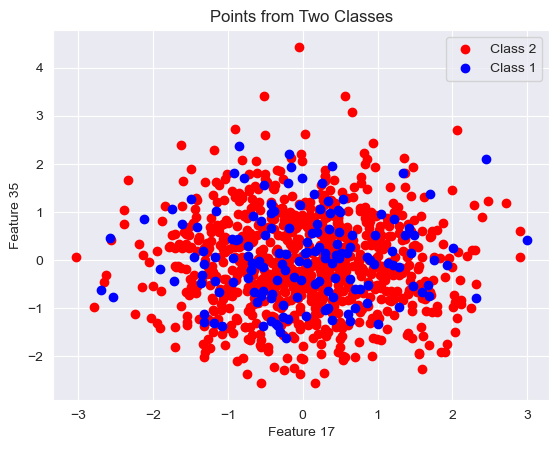

In [36]:
# Assuming you have a DataFrame called 'df' with two feature columns 'feature1' and 'feature2', and a 'Class_Label' column
print(len(df.columns))
print(math.floor(math.log2(len(df.columns))))
# Extract the feature columns and the class labels
feature1 = df['Feature 17']
feature2 = df['Feature 35']
class_labels = df['Class_Label']

# Create a scatter plot for each class
plt.scatter(feature1[class_labels == 2], feature2[class_labels == 2], c='red', label='Class 2')
plt.scatter(feature1[class_labels == 1], feature2[class_labels == 1], c='blue', label='Class 1')

# Set labels and title
plt.xlabel('Feature 17')
plt.ylabel('Feature 35')
plt.title('Points from Two Classes')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [37]:
df.head()

,Class_Label,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40
0,1.000,-0.971,-0.078,0.152,1.100,-1.620,1.270,0.960,-0.601,0.610,...,-0.270,-1.930,-1.160,1.060,-1.290,0.040,0.150,0.629,1.420,-0.073
1,1.000,-1.330,-0.710,-0.563,-0.940,-1.290,-0.585,1.500,0.565,1.310,...,0.405,1.440,1.960,-0.872,-0.410,-0.816,0.188,-0.245,-1.740,0.997
2,2.000,-0.142,-0.370,0.174,0.221,-0.242,0.159,-0.946,-1.160,0.200,...,1.030,0.880,-0.268,-1.270,-2.290,-0.092,-1.310,1.000,2.550,-0.208
3,2.000,0.115,1.020,-1.640,0.270,-0.471,0.735,-0.299,0.007,0.081,...,-0.371,-0.180,-0.204,1.640,0.958,0.143,-1.600,0.435,0.291,-0.103
4,2.000,0.019,-0.381,0.045,0.694,1.300,-2.220,0.593,1.020,-0.918,...,-1.130,-1.530,1.160,-1.530,2.280,-0.611,1.130,-1.900,-1.820,1.970


In [38]:
df.shape

(1000, 41)

In [39]:
print(df['Class_Label'])

0     1.000
1     1.000
2     2.000
3     2.000
4     2.000
       ... 
995   2.000
996   2.000
997   2.000
998   2.000
999   2.000
Name: Class_Label, Length: 1000, dtype: float64


In [40]:
df.Class_Label.value_counts()

2.000    846
1.000    154
Name: Class_Label, dtype: int64

In [41]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Class_Label',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7',
 'Feature 8',
 'Feature 9',
 'Feature 10',
 'Feature 11',
 'Feature 12',
 'Feature 13',
 'Feature 14',
 'Feature 15',
 'Feature 16',
 'Feature 17',
 'Feature 18',
 'Feature 19',
 'Feature 20',
 'Feature 21',
 'Feature 22',
 'Feature 23',
 'Feature 24',
 'Feature 25',
 'Feature 26',
 'Feature 27',
 'Feature 28',
 'Feature 29',
 'Feature 30',
 'Feature 31',
 'Feature 32',
 'Feature 33',
 'Feature 34',
 'Feature 35',
 'Feature 36',
 'Feature 37',
 'Feature 38',
 'Feature 39',
 'Feature 40']

In [42]:
target = 'Class_Label'

<Axes: >

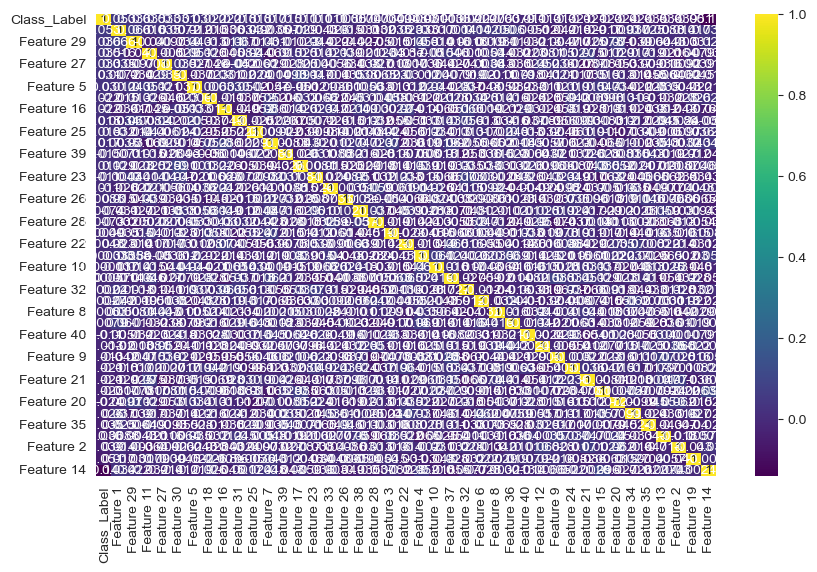

In [43]:
k = 100 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [44]:
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]

In [45]:
X.shape

(1000, 40)

In [46]:
Y.shape

(1000, 1)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called 'df' with feature columns and a target variable 'target'

# Fetch the features (X) and target variable (Y)
X = df.drop('Class_Label', axis=1)
Y = df['Class_Label']

# Define the list of classifiers to try
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]

best_accuracy = 0.0
best_classifier = None
best_features = None
ignored_features = []

# Loop through all classifiers
for clf in classifiers:
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=8)

    # Train the classifier
    clf.fit(x_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(x_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Check if the accuracy is better than the current best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = clf
        best_features = x_train.columns.tolist()

# Find the ignored features
ignored_features = list(set(X.columns) - set(best_features))

# Print the best classifier and its accuracy
print("Best Classifier:", best_classifier)
print("Accuracy:", best_accuracy)

# Print the features used by the best classifier
print("Features Used:")
for feature in best_features:
    print(feature)

# Print the ignored features
print("Ignored Features:")
for feature in ignored_features:
    print(feature)

Best Classifier: GradientBoostingClassifier()
Accuracy: 0.98
Features Used:
Feature 1
Feature 2
Feature 3
Feature 4
Feature 5
Feature 6
Feature 7
Feature 8
Feature 9
Feature 10
Feature 11
Feature 12
Feature 13
Feature 14
Feature 15
Feature 16
Feature 17
Feature 18
Feature 19
Feature 20
Feature 21
Feature 22
Feature 23
Feature 24
Feature 25
Feature 26
Feature 27
Feature 28
Feature 29
Feature 30
Feature 31
Feature 32
Feature 33
Feature 34
Feature 35
Feature 36
Feature 37
Feature 38
Feature 39
Feature 40
Ignored Features:
